# Pandas Data-Time

In [1]:
import pandas as pd
import numpy as np

In [2]:
import time
from datetime import date

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('air_quality_no2_long.csv')

In [5]:
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [7]:
df["city"].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

## How to turn, use and work with date/time data types

Converting the data type

In [8]:
df["date.utc"]=pd.to_datetime(df["date.utc"], errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [10]:
df["date.utc"][1000].month

5

In [11]:
df["month"]=pd.DatetimeIndex(df["date.utc"]).month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
 7   month      2068 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 129.4+ KB


In [13]:
df["weekday"]=pd.DatetimeIndex(df["date.utc"]).weekday

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
 7   month      2068 non-null   int64              
 8   weekday    2068 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 145.5+ KB


In [15]:
df["weekday"]=df["date.utc"].dt.strftime("%a")

In [16]:
#check the data again
df.head()

,city,country,date.utc,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,Fri
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,Thu
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,Thu
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,Thu
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,Thu


In [17]:
df.groupby(df["month"])["value"].mean()

month
5    27.806768
6    23.872167
Name: value, dtype: float64

In [18]:
#to see the first day
df["date.utc"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [19]:
##to see the last day
df["date.utc"].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [20]:
#how many days are in the sample
df["date.utc"].max()-df["date.utc"].min()

Timedelta('44 days 23:00:00')

In [21]:
#right column are the hours and left the quantity of pollution
df.groupby(df["date.utc"].dt.hour)["value"].mean()

date.utc
0     27.955294
1     26.125688
2     23.558511
3     23.242683
4     22.979518
5     27.070732
6     30.635632
7     31.346591
8     29.138636
9     26.071591
10    22.602326
11    21.275294
12    21.029762
13    21.008235
14    21.737647
15    23.840000
16    24.972619
17    26.691667
18    27.089412
19    28.143529
20    29.372941
21    30.973256
22    32.451282
23    31.189412
Name: value, dtype: float64

In [22]:
df["hourofday"]=pd.DatetimeIndex(df["date.utc"]).hour

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
 7   month      2068 non-null   int64              
 8   weekday    2068 non-null   object             
 9   hourofday  2068 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 161.7+ KB


## Group by city, weekday, hour of day - Mean value

In [24]:
#if we have multiple fields, we don't write fd inside the square braquets because it works like a list
#create a new df filtered and named grouped to use it for the visuals 
grouped=df.groupby(["city","weekday","hourofday"]).agg({"value":"mean"})

In [25]:
grouped

value
city      weekday hourofday           
Antwerpen Fri     1          31.333333
                  2          11.500000
                  9          36.500000
          Mon     0          26.000000
                  1          20.500000
...                                ...
Paris     Wed     19         30.516667
                  20         33.466667
                  21         33.750000
                  22         30.166667
                  23         32.800000

[393 rows x 1 columns]

### Heatmaps

- import seaborn as sns
- import matplotlib.pyplot as plt

In [26]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 393 entries, ('Antwerpen', 'Fri', 1) to ('Paris', 'Wed', 23)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   393 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [27]:
pivoted=pd.pivot_table(grouped, values="value", 
               index=["weekday","hourofday"], 
               columns="city")

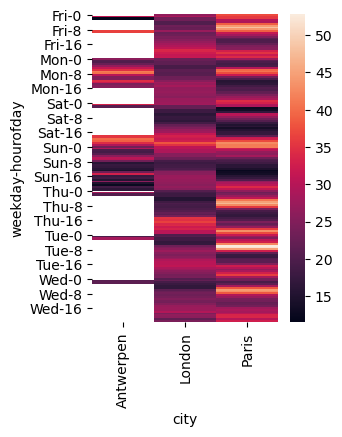

In [34]:
plt.figure(figsize=((3,4)))
sns.heatmap(pivoted)
plt.show()